In [79]:
import pandas as pd

In [80]:
df = pd.read_csv(r'F:\c++\final_cleaned_5W_new.csv')

C:\Users\Rishit\AppData\Local\Temp\ipykernel_2684\2671766065.py:1: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'F:\c++\final_cleaned_5W_new.csv')


In [81]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  
# df

In [82]:
# Get columns that end with the specified suffixes  
suffixes = ['_tech_coding_attempt', '_tech_coding_submitted',   
            '_tech_DSA_submitted', '_tech_DSA_attempt',  
            '_non-tech_attempt', '_non-tech_submitted']  

# Find columns that end with any of these suffixes  
columns_to_multiply = []  
for suffix in suffixes:  
    columns_to_multiply.extend([col for col in df.columns if col.endswith(suffix)])  

# Multiply selected columns by 100  
for column in columns_to_multiply:  
    df[column] = df[column] * 100  

# Display the first few rows to verify the changes  
# print(merged_final_cleaned[columns_to_multiply].head())

In [83]:
def group_highest_qualification(qualification):  
    if pd.isna(qualification):  
        return 'Others'  
    
    # Convert to string, lowercase, and remove spaces  
    qual = str(qualification).lower().strip().replace(' ', '')  
    
    # Engineering Group  
    engineering = [  
        'b.tech', 'btech', 'b.e', 'be', 'b.tech/b.e',   
        'diploma', 'b.tech(electronicsandcommunication)',  
        'mastersofinformationtechnology', 'm.tech'  
    ]  
    
    # Science Group  
    science = [  
        'b.sc', 'bsc', 'm.sc', 'msc', 'b.pharm', 'b.pharmacy',  
        'iti', 'itiwith12th'  
    ]  
    
    # Commerce Group  
    commerce = [  
        'b.com', 'bcom', 'm.com', 'mcom', 'mba', 'bba', 'mms',  
        'bms', 'b.m.s', 'bbi', 'pgdba', 'postgraduatediplomainmanagement',  
        'bachelorinhotelmanagement', 'b.a.hospitality'  
    ]  
    
    # Arts Group  
    arts = [  
        'b.a', 'b.ed', 'm.a', 'b.ed(bachelorofeducation)', 'msw',  
        'l.l.b', 'bfa', 'b.arch'  
    ]  
    
    # Computer Applications (could be grouped with Engineering)  
    computer_applications = [  
        'bca', 'mca', 'pgdca'  
    ]  
    
    # Convert input to comparable format  
    qual = qual.replace('.', '').replace('(', '').replace(')', '')  
    
    if any(q.replace('.', '') in qual for q in engineering + computer_applications):  
        return 'Engineering'  
    elif any(q.replace('.', '') in qual for q in science):  
        return 'Science'  
    elif any(q.replace('.', '') in qual for q in commerce):  
        return 'Commerce'  
    elif any(q.replace('.', '') in qual for q in arts):  
        return 'Arts'  
    else:  
        return 'Others'  

# Apply the grouping  
df['highest_qualification_grouped'] = df['highest_qualification'].apply(group_highest_qualification)  

# To verify the grouping  
print(df['highest_qualification_grouped'].value_counts())

highest_qualification_grouped
Engineering    2404
Science         625
Others          467
Commerce        314
Arts            201
Name: count, dtype: int64


C:\Users\Rishit\AppData\Local\Temp\ipykernel_2684\2745152757.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['highest_qualification_grouped'] = df['highest_qualification'].apply(group_highest_qualification)


In [84]:
df.columns

Index(['id', 'user_id', 'section_id', 'date_of_clearance', 'user_code',
       'course', 'placement_status', 'tech_stack', 'name', 'gender',
       ...
       'p30_tech_DSA_ev', 'p30_non-tech_ev', 'p31_tech_coding_ev',
       'p31_tech_DSA_ev', 'p31_non-tech_ev', 'p32_tech_coding_ev',
       'p32_tech_DSA_ev', 'p32_non-tech_ev', 'hukumu_score',
       'highest_qualification_grouped'],
      dtype='object', length=498)

In [85]:
def group_qualifications(specialization):  
    if pd.isna(specialization):  
        return 'Others'  
    
    # Convert input to lowercase and strip spaces for comparison  
    specialization = str(specialization).lower().strip().replace(' ', '')  
    
    # Engineering Group  
    engineering = [x.lower().strip().replace(' ', '') for x in [  
        'CS', 'Mechanical', 'Computers', 'SoftwareDevelopment', 'ECE',  
        'ComputerApplications', 'IT', 'ComputerEngineering', 'Civil',  
        'Electrical', 'Electrical&Electronics', 'Electronics',  
        'ElectronicsEngineering', 'ProductionEngineering', 'Automobile',  
        'Metallurgy', 'ChemicalEngineering', 'Electronics&Instrumentation',  
        'Mechatronics', 'EnergySystemsEngineer', 'Mehcnnanical', 'Aeronautical',  
        'TextileTechnology', 'PlasticEngineering', 'CyberSecurity', 'CSE',  
        'InstrumentationandControl', 'IndustrialandProduction',  
        'AgricultureEngineering', 'ApparelTechnology', 'Architecture',  
        'Manufacturing', 'AutomobileEngineering', 'FoodEngineering',  
        'ManufacturingEngineering', 'EEE', 'TelecommunicationEngineering',  
        'Bioengineering', 'MineralEngineering', 'MetallurgicalandMaterialsEngineering',  
        'Petroleumengineering', 'MedicalElectronics', 'AgriculturalEngineering',  
        'Cybersecurity'  
    ]]  
    
    # Science Group  
    science = [x.lower().strip().replace(' ', '') for x in [  
        'Biology', 'PharmaceuticalChemistry', 'Chemistry', 'Physics', 'Zoology',  
        'ForensicScience', 'Science', 'Biotechnology', 'FoodTechnology',  
        'Biochemistry', 'BZC', 'Physics(Hons)', 'Nutraceuticals',  
        'ScienceBackgroundstudentin12thStandard', 'Botany',  
        'ElectronicScience', 'Materials', 'IndustrialChemistry', 'Pharmacy',  
        'Nanotechnology', 'Chemistry'  
    ]]  
    
    # Mathematics Group  
    mathematics = [x.lower().strip().replace(' ', '') for x in [  
        'MathematicsWithComputerApplication', 'Mathematics', 'PCM',  
        'MathandScience', 'Statistics', 'Mathmatics', 'Statistic',  
        'Physics,Statistics,Mathematics', 'Mathematics', 'B.ScMathematics'  
    ]]  
    
    # Commerce Group  
    commerce = [x.lower().strip().replace(' ', '') for x in [  
        'Accounts', 'Accounts&Finance', 'Finance', 'Management', 'BBA',  
        'Accounting', 'Marketing', 'BusinessManagement', 'Marketing&Operations',  
        'Corporation', 'Finance&HR', 'OperationsandLogisticsManagement',  
        'Marketing&Finance', 'BusinessAnalytics', 'Business',  
        'HumanResource', 'DigitalMarketing', 'HumanResourceandMarketingManagement',  
        'HR&IT', 'Banking', 'OperationsResearch', 'CommercialApplication', 'Commerce',  
        'Economics'  
    ]]  
    
    # Arts Group  
    arts = [x.lower().strip().replace(' ', '') for x in [  
        'Bengali', 'English', 'Geography', 'History', 'Philosophy', 'Arts',  
        'PoliticalScience', 'Language', 'Sociology', 'Education', 'Journalism',  
        'Finearts', 'FashionDesign'  
    ]]  
    
    if specialization in engineering:  
        return 'Engineering'  
    elif specialization in science:  
        return 'Science'  
    elif specialization in mathematics:  
        return 'Mathematics'  
    elif specialization in commerce:  
        return 'Commerce'  
    elif specialization in arts:  
        return 'Arts'  
    else:  
        return 'Others'  

# Create new column  
df['qualification_specialisation_grouped'] = df['qualification_sepcialisation'].apply(group_qualifications)

C:\Users\Rishit\AppData\Local\Temp\ipykernel_2684\3151920123.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['qualification_specialisation_grouped'] = df['qualification_sepcialisation'].apply(group_qualifications)


In [86]:
import pandas as pd
import numpy as np

# Assuming df is your original DataFrame
# First, group by state and count
state_counts = df['current_state'].value_counts()

# Calculate percentages
state_percentages = state_counts / len(df) * 100

# Sort in descending order
sorted_percentages = state_percentages.sort_values(ascending=False)

# Calculate cumulative percentage
cumulative_percentages = sorted_percentages.cumsum()

# Find states that make up 80% of the data
states_to_keep = cumulative_percentages[cumulative_percentages <= 80]

# Create a mapping for state names (optional: clean up state names)
def clean_state_name(state):
    # Convert to title case and strip whitespace
    cleaned = str(state).title().strip()
    # Handle specific cases
    replacements = {
        'Jammu & Kashmir': 'Jammu and Kashmir',
        'J&K': 'Jammu and Kashmir',
        'Ut': 'Uttar Pradesh',
        'Up': 'Uttar Pradesh',
        'Orissa': 'Odisha'
    }
    return replacements.get(cleaned, cleaned)

# Clean state names
df['cleaned_state'] = df['current_state'].apply(clean_state_name)

# Create a new column with 'Other' for states not in the top 80%
df['state_grouped'] = df['cleaned_state'].apply(
    lambda x: x if x in states_to_keep.index else 'Other'
)

C:\Users\Rishit\AppData\Local\Temp\ipykernel_2684\1042668899.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cleaned_state'] = df['current_state'].apply(clean_state_name)
C:\Users\Rishit\AppData\Local\Temp\ipykernel_2684\1042668899.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['state_grouped'] = df['cleaned_state'].apply(


In [87]:
import pandas as pd
import numpy as np

def transform_ctc_column(df):
    # Convert to numeric first, coercing errors to NaN
    df['ctc'] = pd.to_numeric(df['ctc'], errors='coerce')
    
    # Create a copy of the column to avoid SettingWithCopyWarning
    df['ctc'] = df['ctc'].apply(lambda x: x / 100000 if pd.notna(x) and x > 100000 else x)
    
    return df

# Example usage
# df = pd.read_csv('your_datafile.csv')
df = transform_ctc_column(df)

In [88]:
import pandas as pd
import numpy as np

def reduce_ctc_before_date(df):
    # Convert offer_letter_date to datetime
    df['offer_letter_date'] = pd.to_datetime(df['offer_letter_date'], errors='coerce')
    
    # Convert ctc to numeric, handling potential errors
    df['ctc'] = pd.to_numeric(df['ctc'], errors='coerce')
    
    # Create a mask for offers before or on 2023-04-30
    reduction_mask = (df['offer_letter_date'].notna()) & (df['offer_letter_date'] <= '2023-04-30')
    
    # Create a copy of the dataframe to avoid SettingWithCopyWarning
    df_modified = df.copy()
    
    # Apply 22.3% reduction to CTCs meeting the date condition
    df_modified.loc[reduction_mask, 'ctc'] = df_modified.loc[reduction_mask, 'ctc'] * (1 - 0.223)
    
    # Detailed analysis of the reduction
    reduction_summary = {
        'Total Rows': len(df),
        'Rows Eligible for Reduction': reduction_mask.sum(),
        'Average CTC Before Reduction': df.loc[reduction_mask, 'ctc'].mean(),
        'Average CTC After Reduction': df_modified.loc[reduction_mask, 'ctc'].mean(),
        'Total CTC Reduction': (df.loc[reduction_mask, 'ctc'].sum() - df_modified.loc[reduction_mask, 'ctc'].sum())
    }
    
    return df_modified, reduction_summary

# Verification function
def print_reduction_summary(summary):
    print("CTC Reduction Summary:")
    for key, value in summary.items():
        print(f"{key}: {value}")

# Example usage
df, summary = reduce_ctc_before_date(df)
print_reduction_summary(summary)

CTC Reduction Summary:
Total Rows: 4011
Rows Eligible for Reduction: 1456
Average CTC Before Reduction: 5.681655172413793
Average CTC After Reduction: 4.414646068965518
Total CTC Reduction: 1837.163199999999


In [89]:
# import pandas as pd  
# import numpy as np  

# def analyze_ctc_by_offer_date(df):  
#     # Convert offer_letter_date to datetime  
#     df['offer_letter_date'] = pd.to_datetime(df['offer_letter_date'], errors='coerce')  
    
#     # Clean CTC column - remove NaN, blank, and non-numeric values  
#     df['ctc'] = pd.to_numeric(df['ctc'], errors='coerce')  
    
#     # Filter data before and after 2023, excluding NaN values  
#     before_2023 = df[(df['offer_letter_date'].dt.year < 2023) &   
#                      (df['offer_letter_date'].notna()) &   
#                      (df['ctc'].notna())]  
    
#     after_or_in_2023 = df[(df['offer_letter_date'].dt.year >= 2023) &   
#                            (df['offer_letter_date'].notna()) &   
#                            (df['ctc'].notna())]  
    
#     # Calculate average CTC  
#     avg_ctc_before_2023 = before_2023['ctc'].mean()  
#     avg_ctc_after_2023 = after_or_in_2023['ctc'].mean()  
    
#     # Additional statistics  
#     results = {  
#         'Before 2023': {  
#             'Average CTC': round(avg_ctc_before_2023, 2),  
#             'Number of Valid Offers': len(before_2023),  
#             'Median CTC': round(before_2023['ctc'].median(), 2),  
#             'Min CTC': round(before_2023['ctc'].min(), 2),  
#             'Max CTC': round(before_2023['ctc'].max(), 2)  
#         },  
#         'From 2023 Onwards': {  
#             'Average CTC': round(avg_ctc_after_2023, 2),  
#             'Number of Valid Offers': len(after_or_in_2023),  
#             'Median CTC': round(after_or_in_2023['ctc'].median(), 2),  
#             'Min CTC': round(after_or_in_2023['ctc'].min(), 2),  
#             'Max CTC': round(after_or_in_2023['ctc'].max(), 2)  
#         },  
#         'Data Cleaning Summary': {  
#             'Total Rows': len(df),  
#             'Rows with Valid Offer Date Before 2023': len(before_2023),  
#             'Rows with Valid Offer Date From 2023': len(after_or_in_2023)  
#         }  
#     }  
    
#     return results  

# # Detailed print function for better readability  
# def print_ctc_analysis(results):  
#     print("CTC Analysis Results:")  
#     print("\n--- Before 2023 ---")  
#     for key, value in results['Before 2023'].items():  
#         print(f"{key}: {value}")  
    
#     print("\n--- From 2023 Onwards ---")  
#     for key, value in results['From 2023 Onwards'].items():  
#         print(f"{key}: {value}")  
    
#     print("\n--- Data Cleaning Summary ---")  
#     for key, value in results['Data Cleaning Summary'].items():  
#         print(f"{key}: {value}")  

# # Example usage
# # df = pd.read_csv('your_datafile.csv')
# results = analyze_ctc_by_offer_date(df)
# # print(results)

In [90]:
list(df.columns)

['id',
 'user_id',
 'section_id',
 'date_of_clearance',
 'user_code',
 'course',
 'placement_status',
 'tech_stack',
 'name',
 'gender',
 'subrole',
 'current_state',
 'current_city',
 'highest_qualification',
 'qualification_sepcialisation',
 'tenth_percentage',
 'twelfth_percentage',
 'grad_year',
 'grad_percentage',
 'work_experience_any',
 'work_experience_relevant',
 'work_experience_duration',
 'current_ctc',
 'last_company',
 'cohort_reco',
 'days_in_placement',
 'position_id',
 'company_name',
 'ctc',
 'isa_status',
 'morat_probation_internship_period',
 'morat_salary',
 'verbal_offer_date',
 'offer_letter_date',
 'offer_letter_sent_to_ops',
 'cc',
 'bd_poc',
 'hired_post',
 'removed_from_placement_workspace',
 'experience_form_filled',
 'hired_before',
 'disbursal_date',
 'emi_repayment_start_date',
 'nbfc',
 'amount',
 'is_active',
 'created_at',
 'updated_at',
 'placement_sub_status',
 'placement_history_id',
 'disbursal_status',
 'disbursal_status_last_updated_at',
 'role',

In [91]:
print(df['ctc'].describe())
print(df['offer_letter_date'].head(5))

count    4002.000000
mean        4.496407
std         1.915353
min         0.000000
25%         3.600000
50%         4.400000
75%         5.000000
max        38.000000
Name: ctc, dtype: float64
0   2024-12-05
1   2023-03-17
2   2024-12-17
3   2024-06-11
4   2024-12-17
Name: offer_letter_date, dtype: datetime64[ns]


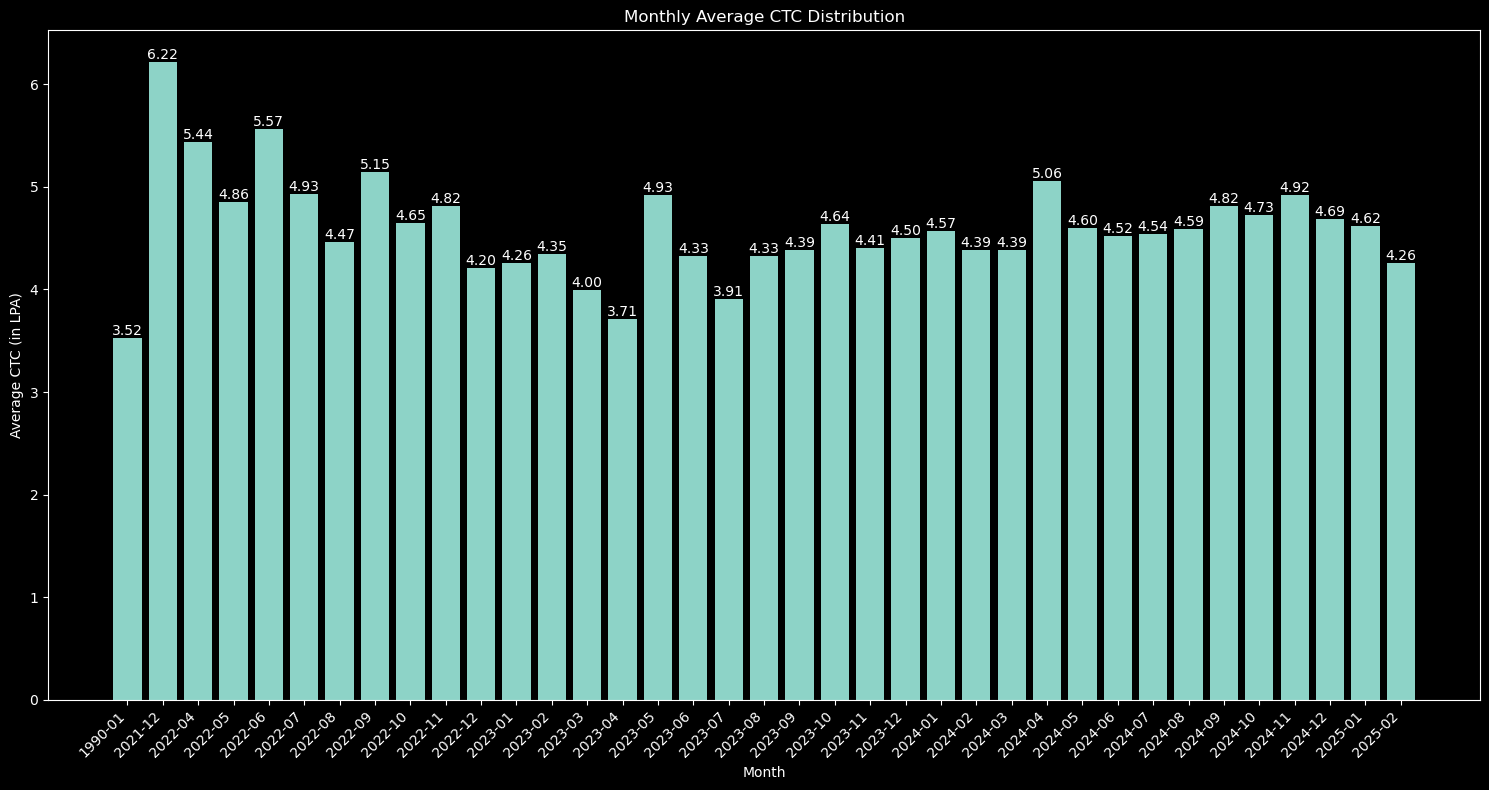

In [92]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Drop any NaN values first  
df = df.dropna(subset=['offer_letter_date', 'ctc'])  

# Extract month from offer_letter_date  
df['month'] = pd.to_datetime(df['offer_letter_date']).dt.strftime('%Y-%m')  

# Calculate monthly average CTC  
monthly_avg_ctc = df.groupby('month')['ctc'].mean().reset_index()  

# Sort by month  
monthly_avg_ctc = monthly_avg_ctc.sort_values('month')  

# Create a figure with larger size  
plt.figure(figsize=(15, 8))  

# Create bar plot  
plt.bar(monthly_avg_ctc['month'], monthly_avg_ctc['ctc'])  

# Rotate x-axis labels for better readability  
plt.xticks(rotation=45, ha='right')  

# Set labels and title  
plt.xlabel('Month')  
plt.ylabel('Average CTC (in LPA)')  
plt.title('Monthly Average CTC Distribution')  

# Add value labels on top of each bar  
for i, v in enumerate(monthly_avg_ctc['ctc']):  
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')  

# Adjust layout to prevent label cutoff  
plt.tight_layout()  

# Show the plot  
plt.show()

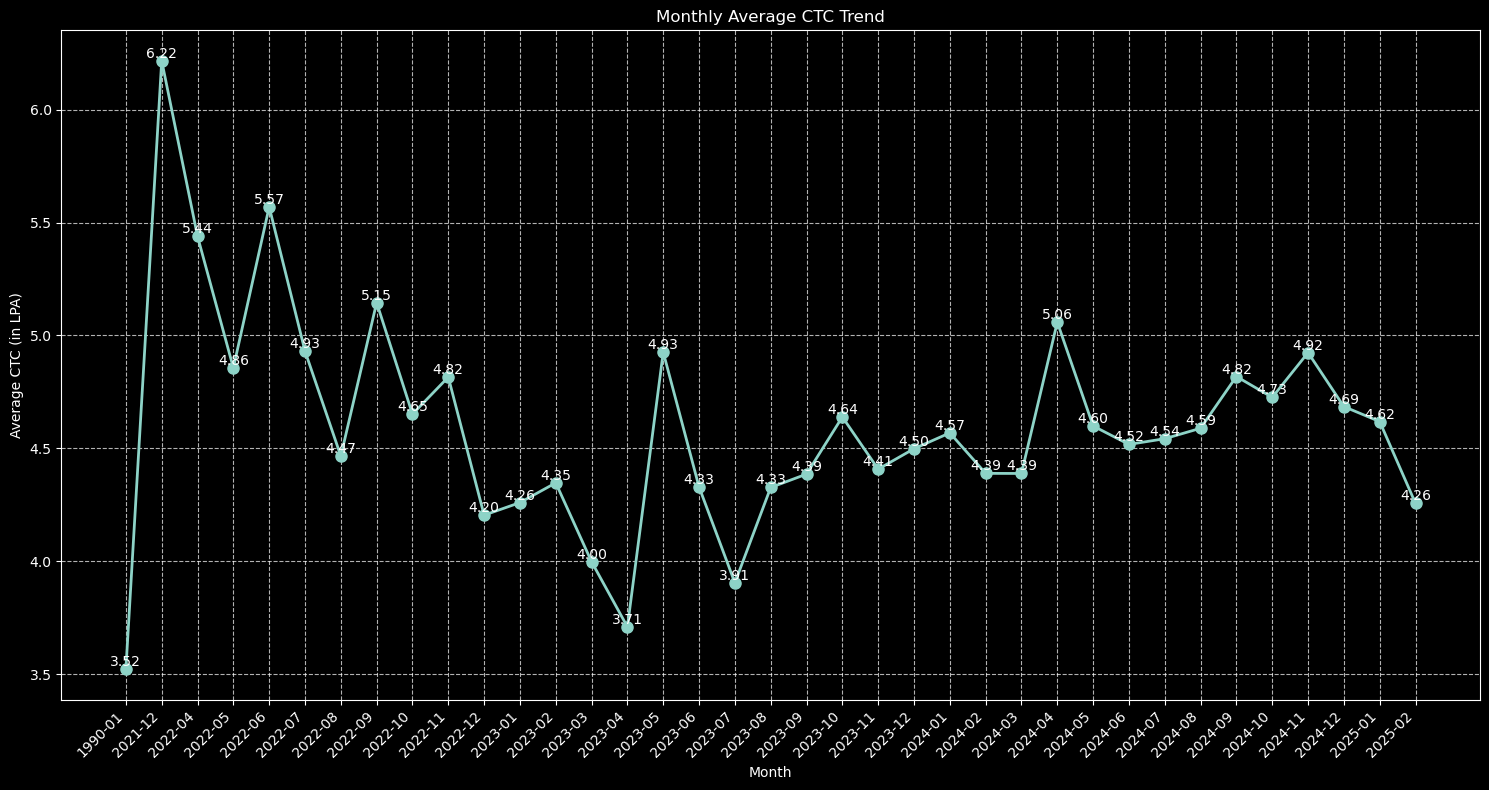

In [93]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Drop any NaN values first  
df = df.dropna(subset=['offer_letter_date', 'ctc'])  

# Extract month from offer_letter_date  
df['month'] = pd.to_datetime(df['offer_letter_date']).dt.strftime('%Y-%m')  

# Calculate monthly average CTC  
monthly_avg_ctc = df.groupby('month')['ctc'].mean().reset_index()  

# Sort by month  
monthly_avg_ctc = monthly_avg_ctc.sort_values('month')  

# Create a figure with larger size  
plt.figure(figsize=(15, 8))  

# Create line plot  
plt.plot(monthly_avg_ctc['month'], monthly_avg_ctc['ctc'], marker='o', linewidth=2, markersize=8)  

# Rotate x-axis labels for better readability  
plt.xticks(rotation=45, ha='right')  

# Set labels and title  
plt.xlabel('Month')  
plt.ylabel('Average CTC (in LPA)')  
plt.title('Monthly Average CTC Trend')  

# Add value labels on top of each point  
for i, v in enumerate(monthly_avg_ctc['ctc']):  
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')  

# Add grid for better readability  
plt.grid(True, linestyle='--', alpha=0.7)  

# Adjust layout to prevent label cutoff  
plt.tight_layout()  

# Show the plot  
plt.show()

In [96]:
df = df[df['ctc'] > 1.5] 

In [97]:
df['ctc'].describe()

count    3772.000000
mean        4.658823
std         1.688751
min         1.554000
25%         3.885000
50%         4.662000
75%         5.000000
max        31.540000
Name: ctc, dtype: float64

In [ ]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split, KFold  
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from xgboost import XGBRegressor  
import optuna  
import warnings  
warnings.filterwarnings('ignore')  

def create_career_level_bands(df):  
    conditions = [  
        (df['work_experience_duration'] < 2),  
        (df['work_experience_duration'] >= 2) & (df['work_experience_duration'] < 5),  
        (df['work_experience_duration'] >= 5) & (df['work_experience_duration'] < 8),  
        (df['work_experience_duration'] >= 8)  
    ]  
    choices = ['Entry Level', 'Mid Level', 'Senior Level', 'Expert Level']  
    return pd.Series(np.select(conditions, choices, default='Unknown'), index=df.index)  



def engineer_features(df):  
    # 1. Basic Feature Engineering  
    df['experience_squared'] = df['work_experience_duration'] ** 2  
    df['experience_flag'] = (df['work_experience_duration'] > 0).astype(int)  
    
    # 2. Education Score  
    education_weights = {  
        'B.Tech': 0.8,  
        'M.Tech': 1.0,  
        'B.Sc': 0.7,  
        'M.Sc': 0.9,  
        'BCA': 0.6,  
        'MCA': 0.8,  
        'Others': 0.5  
    }  
    df['education_score'] = df['highest_qualification_grouped'].map(education_weights).fillna(0.5)  
    
    # 3. Performance Scores  
    def calculate_weighted_score(df, columns):  
        """  
        Calculate the average score across specified columns,   
        ignoring NA values.  
        
        Args:  
            df (pd.DataFrame): Input DataFrame  
            columns (list): Columns to calculate average from  
        
        Returns:  
            pd.Series: Average scores for each row  
        """  
        # Check if any of the specified columns exist  
        if not any(col in df.columns for col in columns):  
            return pd.Series(0, index=df.index)  
        
        # Select existing columns  
        existing_cols = [col for col in columns if col in df.columns]  
        
        # Calculate row-wise mean, ignoring NA values  
        return df[existing_cols].mean(axis=1, skipna=True)
    
    # Define column groups  
    coding_cols = [col for col in df.columns if '_tech_coding' in col and '_ev' in col]  
    dsa_cols = [col for col in df.columns if '_tech_DSA' in col and '_ev' in col]  
    non_tech_cols = [col for col in df.columns if '_non-tech' in col and '_ev' in col]  
    
    df['coding_score'] = calculate_weighted_score(df, coding_cols)  
    df['dsa_score'] = calculate_weighted_score(df, dsa_cols)  
    df['non_tech_score'] = calculate_weighted_score(df, non_tech_cols)  
    
    # 4. Combined Scores  
    df['tech_score'] = df['coding_score'] * 0.5 + df['dsa_score'] * 0.5 
    df['overall_score'] = df['tech_score'] * 0.6 + df['non_tech_score'] * 0.4  
    
    # 5. Career Level  
    df['career_level'] = create_career_level_bands(df)  
    
    # Define the top tech stacks to keep

    # Clean and standardize tech stack names  
    def clean_tech_stack(tech):  
        # Convert to uppercase and strip whitespace  
        cleaned = str(tech).upper().strip()  
        
        # Standardization mappings  
        replacements = {  
            'REACT NATIVE': 'REACT NATIVE',  
            'ANDROID': 'ANDROID',  
            'MERN+JAVA': 'MERN + JAVA',  
            'MERN+ JAVA': 'MERN + JAVA',  
            'JAVAIT': 'JAVA IT'  
        }  
        
        return replacements.get(cleaned, cleaned)  

    # Clean tech stack names  
    df['cleaned_tech_stack'] = df['tech_stack'].apply(clean_tech_stack)  

    top_tech_stacks = ['MERN', 'JAVA', 'DA', 'NODE', 'SDET']

    # Create a new column for grouped tech stacks
    def group_tech_stacks(tech):
        return tech if tech in top_tech_stacks else 'OTHERS'

    # Apply the grouping
    df['tech_stack_grouped_top5'] = df['cleaned_tech_stack'].apply(group_tech_stacks)
    
    # 7. Location Features  
    location_stats = df.groupby('state_grouped').agg({  
        'work_experience_duration': ['mean', 'count']  
    }).reset_index()  
    location_stats.columns = ['state_grouped', 'location_avg_exp', 'location_count']  
    df = df.merge(location_stats, on='state_grouped', how='left')  
    
    # 8. Progress Features  
    attendance_cols = [col for col in df.columns if any(x in col for x in ['_tech_DSA', '_tech_coding', '_non-tech'])  
                      and not any(x in col for x in ['_attempt', '_submitted', '_ev'])]  
    

    # 9. Attendance Features  
    def count_non_nan_columns(df, column_filter):  
        """  
        Count non-NaN columns for a specific filter  
        """  
        cols = [col for col in attendance_cols if column_filter in col]  
        return len([col for col in cols if df[col].notna().any()])  

    df['dsa_attendance_rate'] = df[[col for col in attendance_cols if '_tech_DSA' in col]].notna().sum(axis=1) / \
        count_non_nan_columns(df, '_tech_DSA')  

    df['coding_attendance_rate'] = df[[col for col in attendance_cols if '_tech_coding' in col]].notna().sum(axis=1) / \
        count_non_nan_columns(df, '_tech_coding')  

    df['nontech_attendance_rate'] = df[[col for col in attendance_cols if '_non-tech' in col]].notna().sum(axis=1) / \
        count_non_nan_columns(df, '_non-tech')  

    df['overall_attendance_rate'] = df[attendance_cols].notna().sum(axis=1) / \
        count_non_nan_columns(df, '')  

    # 10. Attempt Features  
    attempt_cols = [col for col in df.columns if '_attempt' in col]  
    dsa_attempt_cols = [col for col in attempt_cols if '_tech_DSA' in col]  
    coding_attempt_cols = [col for col in attempt_cols if '_tech_coding' in col]  
    nontech_attempt_cols = [col for col in attempt_cols if '_non-tech' in col]  

    # Total attempts considering only non-NaN values  
    df['total_attempts'] = df[attempt_cols].apply(pd.Series.dropna, axis=1).sum(axis=1)  
    df['avg_attempts_per_test'] = df[attempt_cols].apply(pd.Series.dropna, axis=1).mean(axis=1)  
    df['max_attempts'] = df[attempt_cols].apply(pd.Series.dropna, axis=1).max(axis=1)  


    # 11. Submission Features  
    submit_cols = [col for col in df.columns if '_submitted' in col]  
    dsa_submit_cols = [col for col in submit_cols if '_tech_DSA' in col]  
    coding_submit_cols = [col for col in submit_cols if '_tech_coding' in col]  
    nontech_submit_cols = [col for col in submit_cols if '_non-tech' in col]  

    # Submission rates considering only non-NaN values  
    df['submission_rate'] = df[submit_cols].apply(pd.Series.dropna, axis=1).mean(axis=1)  
    df['dsa_submission_rate'] = df[dsa_submit_cols].apply(pd.Series.dropna, axis=1).mean(axis=1)  
    df['coding_submission_rate'] = df[coding_submit_cols].apply(pd.Series.dropna, axis=1).mean(axis=1)  
    df['nontech_submission_rate'] = df[nontech_submit_cols].apply(pd.Series.dropna, axis=1).mean(axis=1)
        
    # 9. Attendance Features  
    # DSA Attendance  
    dsa_attendance_columns = ['p1_tech_DSA', 'p2_tech_DSA', 'p3_tech_DSA', 'p4_tech_DSA', 'p5_tech_DSA']  
    df['avg_dsa_attendance'] = df[dsa_attendance_columns].mean(axis=1, skipna=True)  

    # Coding Attendance  
    coding_attendance_columns = ['p1_tech_coding', 'p2_tech_coding', 'p3_tech_coding', 'p4_tech_coding', 'p5_tech_coding']  
    df['avg_coding_attendance'] = df[coding_attendance_columns].mean(axis=1, skipna=True)  

    # Non-Tech Attendance  
    nontech_attendance_columns = ['p1_non-tech', 'p2_non-tech', 'p3_non-tech', 'p4_non-tech', 'p5_non-tech']  
    df['avg_nontech_attendance'] = df[nontech_attendance_columns].mean(axis=1, skipna=True)  

    # 10. Attempt Features  
    # DSA Attempts  
    dsa_attempt_columns = ['p1_tech_DSA_attempt', 'p2_tech_DSA_attempt', 'p3_tech_DSA_attempt', 'p4_tech_DSA_attempt', 'p5_tech_DSA_attempt']  
    df['avg_dsa_attempt'] = df[dsa_attempt_columns].mean(axis=1, skipna=True)  

    # Coding Attempts  
    coding_attempt_columns = ['p1_tech_coding_attempt', 'p2_tech_coding_attempt', 'p3_tech_coding_attempt', 'p4_tech_coding_attempt', 'p5_tech_coding_attempt']  
    df['avg_coding_attempt'] = df[coding_attempt_columns].mean(axis=1, skipna=True)  

    # Non-Tech Attempts  
    nontech_attempt_columns = ['p1_non-tech_attempt', 'p2_non-tech_attempt', 'p3_non-tech_attempt', 'p4_non-tech_attempt', 'p5_non-tech_attempt']  
    df['avg_nontech_attempt'] = df[nontech_attempt_columns].mean(axis=1, skipna=True)  


    # 11. Submission Features  
    # DSA Submissions  
    dsa_submission_columns = ['p1_tech_DSA_submitted', 'p2_tech_DSA_submitted', 'p3_tech_DSA_submitted', 'p4_tech_DSA_submitted', 'p5_tech_DSA_submitted']  
    df['avg_dsa_submission'] = df[dsa_submission_columns].mean(axis=1, skipna=True)  

    # Coding Submissions  
    coding_submission_columns = ['p1_tech_coding_submitted', 'p2_tech_coding_submitted', 'p3_tech_coding_submitted', 'p4_tech_coding_submitted', 'p5_tech_coding_submitted']  
    df['avg_coding_submission'] = df[coding_submission_columns].mean(axis=1, skipna=True)  

    # Non-Tech Submissions  
    nontech_submission_columns = ['p1_non-tech_submitted', 'p2_non-tech_submitted', 'p3_non-tech_submitted', 'p4_non-tech_submitted', 'p5_non-tech_submitted']  
    df['avg_nontech_submission'] = df[nontech_submission_columns].mean(axis=1, skipna=True)  

    

    # 13. Interaction Features  
    df['exp_edu_interaction'] = df['education_score'] * (1 + df['work_experience_duration'])  
    df['tech_exp_interaction'] = df['tech_score'] * (1 + df['work_experience_duration'])  

        #14 Buckets
    bins = [0, 30, 60, float('inf')]  
    labels = ['0 to 30', '30 to 60', '60+'] 


    metrics = [  
    'avg_dsa_attendance',  
    'avg_coding_attendance',  
    'avg_nontech_attendance',  
    'avg_dsa_attempt',  
    'avg_coding_attempt',  
    'avg_nontech_attempt',  
    'avg_dsa_submission',  
    'avg_coding_submission',  
    'avg_nontech_submission'  
    ]        

    # Create bucket columns  
    for metric in metrics:  
        df[f'{metric}_bucket'] = pd.cut(df[metric], bins=bins, labels=labels, right=False)  

    

    return df  

def prepare_data(df):  
    # Clean CTC  
    df['ctc'] = df['ctc'].apply(lambda x: x / 100000 if x > 100000 else x)  
    df = df[df['ctc'] > 0]  
    
    # Engineer features  
    df = engineer_features(df)  
    
    numeric_features = [  
        'coding_score',  
    'dsa_score',  
    'non_tech_score',  
    'tech_score',  
    'overall_score',  
    'dsa_attendance_rate',  
    'coding_attendance_rate',  
    'nontech_attendance_rate',  
    'overall_attendance_rate',  
    'total_attempts',  
    'avg_attempts_per_test',  
    'max_attempts',  
    # 'dsa_avg_attempts',  
    # 'coding_avg_attempts',  
    # 'nontech_avg_attempts',  
    'submission_rate',  
    'dsa_submission_rate',  
    'coding_submission_rate',  
    'nontech_submission_rate',  
    'engagement_score',  
    'exp_edu_interaction',  
    'tech_exp_interaction',
    'hukumu_score'
    # 'avg_dsa_attendance',  
    # 'avg_coding_attendance',  
    # 'avg_nontech_attendance',    
    # 'avg_dsa_attempt',  
    # 'avg_coding_attempt',  
    # 'avg_nontech_attempt',    
    # 'avg_dsa_submission',  
    # 'avg_coding_submission',  
    # 'avg_nontech_submission' 
    ]  
    
    categorical_features = [  
        'tech_stack_grouped_top5',  
        'highest_qualification_grouped',  
        'gender',  
        'state_grouped',  
        'experience_flag',  
        'career_level',
        'work_experience_any',
        'qualification_specialisation_grouped'
        'nontech_bucket_attempt',
        'coding_bucket_attempt',
        'dsa_bucket_attempt',
        'avg_dsa_attendance_bucket',  
        'avg_coding_attendance_bucket',  
        'avg_nontech_attendance_bucket',  
        'avg_dsa_attempt_bucket',  
        'avg_coding_attempt_bucket',  
        'avg_nontech_attempt_bucket',  
        'avg_dsa_submission_bucket',  
        'avg_coding_submission_bucket',  
        'avg_nontech_submission_bucket' 
    ]  
    
    # Encode categorical variables  
    encoders = {}  
    for feature in categorical_features:  
        if feature in df.columns:  
            df[feature] = df[feature].astype(str)  
            df[feature] = df[feature].replace('nan', 'Unknown')  
            le = LabelEncoder()  
            df[feature] = le.fit_transform(df[feature])  
            encoders[feature] = le  
    
    all_features = [f for f in numeric_features + categorical_features if f in df.columns]  
    numeric_features_exist = [f for f in numeric_features if f in df.columns]  
    
    # Handle missing values and scale  
    df[numeric_features_exist] = df[numeric_features_exist].fillna(df[numeric_features_exist].median())  
    scaler = StandardScaler()  
    df[numeric_features_exist] = scaler.fit_transform(df[numeric_features_exist])  
    
    X = df[all_features]  
    y = df['ctc']  
    
    return X, y, encoders  

def custom_objective(trial, X, y):  
    params = {  
        'n_estimators': trial.suggest_int('n_estimators', 80, 150),  
        'max_depth': trial.suggest_int('max_depth', 4, 6),  
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.03),  
        'subsample': trial.suggest_uniform('subsample', 0.8, 0.9),  
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 0.9),  
        'min_child_weight': trial.suggest_int('min_child_weight', 6, 8),  
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1e-6),  
        # 'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 1.0),  
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 1.0),  
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10),  
        'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.8, 1.2)  
    }  
    
    model = XGBRegressor(  
        **params,  
        random_state=42,  
        tree_method='hist',  
        objective='reg:squarederror'  
    )  
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  
    mae_scores = []  
    mape_scores = []  
    rmse_scores = []  
    
    for train_idx, val_idx in kf.split(X):  
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]  
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]  
        
        model.fit(  
            X_train,  
            y_train,  
            eval_set=[(X_val, y_val)],  
            verbose=False  
        )  
        
        y_pred = model.predict(X_val)  
        
        mae = mean_absolute_error(y_val, y_pred)  
        mape = np.mean(np.abs((y_val - y_pred) / y_val))  
        rmse = np.sqrt(np.mean((y_val - y_pred)**2))  
        
        mae_scores.append(mae)  
        mape_scores.append(mape)  
        rmse_scores.append(rmse)  
    
    return 0.4 * np.mean(mae_scores) + 0.4 * np.mean(mape_scores) + 0.2 * np.mean(rmse_scores)  

def main():  
    # Prepare data  
    df_copy = df.copy()  
    X, y, encoders = prepare_data(df_copy)  
    
    # Split data  
    X_train, X_test, y_train, y_test = train_test_split(  
        X, y, test_size=0.2, random_state=42  
    )  
    
    print("Data shape:", X.shape)  
    print("\nCTC Statistics:")  
    print(y.describe())  
    
    # Optimize hyperparameters  
    study = optuna.create_study(direction='minimize')  
    study.optimize(  
        lambda trial: custom_objective(trial, X_train, y_train),  
        n_trials=100,  
        n_jobs=-1  
    )  
    
    # Train final model  
    final_params = study.best_params  
    print("\nBest hyperparameters:", final_params)  
    
    final_model = XGBRegressor(  
        **final_params,  
        random_state=42,  
        tree_method='hist',  
        objective='reg:squarederror'  
    )  
    
    final_model.fit(  
        X_train,  
        y_train,  
        eval_set=[(X_test, y_test)],  
        verbose=False  
    )  
    
    # Make predictions  
    y_train_pred = final_model.predict(X_train)  
    y_test_pred = final_model.predict(X_test)  
    
    test_results_df = pd.DataFrame({  
        'user_code': X_test.index,  # Assuming index contains user codes  
        'actual_ctc': y_test * 100000,  # Convert back to original scale  
        'predicted_ctc': y_test_pred * 100000,  # Convert back to original scale  
        'absolute_error': np.abs(y_test * 100000 - y_test_pred * 100000),  
        'percentage_error': np.abs((y_test - y_test_pred) / y_test) * 100  
    })  

    # Calculate metrics  
    metrics = {  
        'R² Score': (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)),  
        'RMSE': (  
            np.sqrt(mean_squared_error(y_train, y_train_pred)),  
            np.sqrt(mean_squared_error(y_test, y_test_pred))  
        ),  
        'MAE': (  
            mean_absolute_error(y_train, y_train_pred),  
            mean_absolute_error(y_test, y_test_pred)  
        ),  
        'MAPE': (  
            np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100,  
            np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100  
        )  
    }  
    
    # Print metrics  
    print("\nModel Performance Metrics:")  
    for metric_name, (train_value, test_value) in metrics.items():  
        print(f"{metric_name}:")  
        print(f"  Training: {train_value:.3f}")  
        print(f"  Test: {test_value:.3f}")  
    
    # Feature importance analysis  
    feature_importance = pd.DataFrame({  
        'feature': X.columns,  
        'importance': final_model.feature_importances_  
    }).sort_values('importance', ascending=False)  
    
    print("\nTop 15 Most Important Features:")  
    print(feature_importance.head(15))  

    print("\nTest Set Prediction Results:")  
    print(test_results_df)  

    test_results_df.to_csv('test_set_predictions.csv', index=False)
    
    return final_model, X, y, feature_importance, encoders, (X_test, y_test, y_test_pred,test_results_df)  

def evaluate_model(model, X_test, y_test, y_pred):  
    """  
    Evaluate model performance with detailed analysis  
    """  
    # Basic metrics  
    r2 = r2_score(y_test, y_pred)  
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
    mae = mean_absolute_error(y_test, y_pred)  
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  
    
    print("\nDetailed Model Evaluation:")  
    print(f"R² Score: {r2:.3f}")  
    print(f"RMSE: {rmse:.3f}")  
    print(f"MAE: {mae:.3f}")  
    print(f"MAPE: {mape:.3f}%")  
    
    # Error distribution analysis  
    errors = y_test - y_pred  
    print("\nError Distribution:")  
    print(pd.Series(errors).describe())  
    
    # Salary band analysis  
    salary_bands = pd.cut(y_test, bins=[0, 3, 6, 9, 12, float('inf')],  
                         labels=['0-3L', '3-6L', '6-9L', '9-12L', '12L+'])  
    
    band_metrics = pd.DataFrame()  
    for band in salary_bands.unique():  
        mask = salary_bands == band  
        if mask.sum() > 0:  
            band_mae = mean_absolute_error(y_test[mask], y_pred[mask])  
            band_mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100  
            band_metrics.loc[band, 'Count'] = mask.sum()  
            band_metrics.loc[band, 'MAE'] = band_mae  
            band_metrics.loc[band, 'MAPE'] = band_mape  
    
    print("\nPerformance by Salary Band:")  
    print(band_metrics)  
    
    return {  
        'r2': r2,  
        'rmse': rmse,  
        'mae': mae,  
        'mape': mape,  
        'error_distribution': errors,  
        'band_metrics': band_metrics  
    }  

def predict_salary(model, new_data, encoders, feature_list):  
    """  
    Make predictions for new candidates  
    """  
    # Prepare the data  
    processed_data = new_data.copy()  
    
    # Apply encoders  
    for feature, encoder in encoders.items():  
        if feature in processed_data.columns:  
            processed_data[feature] = processed_data[feature].astype(str)  
            processed_data[feature] = processed_data[feature].replace('nan', 'Unknown')  
            processed_data[feature] = encoder.transform(processed_data[feature])  
    
    # Ensure all features are present  
    for feature in feature_list:  
        if feature not in processed_data.columns:  
            processed_data[feature] = 0  
    
    # Reorder columns to match training data  
    processed_data = processed_data[feature_list]  
    
    # Make predictions  
    predictions = model.predict(processed_data)  
    
    return predictions  

def analyze_feature_importance(model, feature_names, top_n=15):  
    """  
    Analyze and visualize feature importance  
    """  
    importance = model.feature_importances_  
    feature_importance = pd.DataFrame({  
        'feature': feature_names,  
        'importance': importance  
    }).sort_values('importance', ascending=False)  
    
    print(f"\nTop {top_n} Most Important Features:")  
    print(feature_importance.head(top_n))  
    
    # Group features by category  
    feature_categories = {  
        'Experience': ['work_experience', 'experience_squared', 'experience_flag'],  
        'Education': ['education_score', 'highest_qualification'],  
        'Technical': ['tech_score', 'coding_score', 'dsa_score'],  
        'Non-Technical': ['non_tech_score'],  
        'Engagement': ['engagement_score', 'attendance_rate', 'submission_rate'],  
        'Location': ['current_state', 'location_avg_exp'],  
        'Other': []  
    }  
    
    category_importance = {}  
    for category, features in feature_categories.items():  
        mask = feature_importance['feature'].str.contains('|'.join(features), case=False)  
        category_importance[category] = feature_importance[mask]['importance'].sum()  
    
    print("\nFeature Importance by Category:")  
    for category, importance in sorted(category_importance.items(), key=lambda x: x[1], reverse=True):  
        print(f"{category}: {importance:.3f}")  
    
    return feature_importance, category_importance  

def save_model_artifacts(model, encoders, feature_list, metrics, filename_prefix='salary_model'):  
    """  
    Save model and related artifacts  
    """  
    import joblib  
    from datetime import datetime  
    
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')  
    
    # Save model  
    model_filename = f"{filename_prefix}_{timestamp}.joblib"  
    joblib.dump(model, model_filename)  
    
    # Save encoders  
    encoders_filename = f"{filename_prefix}_encoders_{timestamp}.joblib"  
    joblib.dump(encoders, encoders_filename)  
    
    # Save feature list  
    feature_filename = f"{filename_prefix}_features_{timestamp}.txt"  
    with open(feature_filename, 'w') as f:  
        f.write('\n'.join(feature_list))  
    
    # Save metrics  
    metrics_filename = f"{filename_prefix}_metrics_{timestamp}.txt"  
    with open(metrics_filename, 'w') as f:  
        f.write("Model Performance Metrics:\n")  
        for metric_name, value in metrics.items():  
            if isinstance(value, (int, float)):  
                f.write(f"{metric_name}: {value:.3f}\n")  
    
    print(f"\nModel artifacts saved with prefix '{filename_prefix}_{timestamp}'")  
    
    return {  
        'model': model_filename,  
        'encoders': encoders_filename,  
        'features': feature_filename,  
        'metrics': metrics_filename  
    }  

# Main execution  
if __name__ == "__main__":  
    # Load your data  
    # df = pd.read_csv('your_data.csv')  
    
    # Run the main analysis  
    model, X, y, feature_importance, encoders, test_data = main()  
    
    # Print feature importance summary  
    print("\nFeature Importance Summary:")  
    analyze_feature_importance(model, X.columns)  
    
    # Evaluate model on test data  
    X_test, y_test, y_test_pred, test_results_df = test_data  
    evaluation_metrics = evaluate_model(model, X_test, y_test, y_test_pred)  
    
    # Save model artifacts  
    saved_files = save_model_artifacts(  
        model,  
        encoders,  
        list(X.columns),  
        evaluation_metrics  
    )  
    
    print("\nAnalysis complete. Model and artifacts saved successfully.")

[I 2025-02-24 15:41:47,388] A new study created in memory with name: no-name-721b4613-e816-41db-b3a9-83f20fd69c19


Data shape: (3772, 35)

CTC Statistics:
count    3772.000000
mean        4.658823
std         1.688751
min         1.554000
25%         3.885000
50%         4.662000
75%         5.000000
max        31.540000
Name: ctc, dtype: float64


[I 2025-02-24 15:41:51,725] Trial 5 finished with value: 0.8772837272763484 and parameters: {'n_estimators': 82, 'max_depth': 4, 'learning_rate': 0.014154761138126611, 'subsample': 0.8823088537550793, 'colsample_bytree': 0.8496034965667051, 'min_child_weight': 6, 'gamma': 1.2746038799266211e-08, 'reg_lambda': 0.0018939625216495854, 'max_delta_step': 6, 'scale_pos_weight': 0.8058860720783099}. Best is trial 5 with value: 0.8772837272763484.
[I 2025-02-24 15:41:52,610] Trial 4 finished with value: 0.8758293684007539 and parameters: {'n_estimators': 103, 'max_depth': 4, 'learning_rate': 0.012279203232978635, 'subsample': 0.8475234969711957, 'colsample_bytree': 0.8097147411661817, 'min_child_weight': 6, 'gamma': 1.0492139974840301e-07, 'reg_lambda': 0.020099579187460553, 'max_delta_step': 4, 'scale_pos_weight': 1.143828798993717}. Best is trial 4 with value: 0.8758293684007539.
[I 2025-02-24 15:41:53,250] Trial 6 finished with value: 0.8718542727898092 and parameters: {'n_estimators': 115,


Best hyperparameters: {'n_estimators': 145, 'max_depth': 5, 'learning_rate': 0.024802187043191863, 'subsample': 0.8089190511834051, 'colsample_bytree': 0.8427540890317107, 'min_child_weight': 8, 'gamma': 2.5787657117977676e-08, 'reg_lambda': 0.11598746710896121, 'max_delta_step': 1, 'scale_pos_weight': 1.180031229956636}

Model Performance Metrics:
R² Score:
  Training: 0.292
  Test: 0.149
RMSE:
  Training: 1.440
  Test: 1.472
MAE:
  Training: 0.977
  Test: 1.014
MAPE:
  Training: 23.578
  Test: 24.713

Top 15 Most Important Features:
                       feature  importance
25         work_experience_any    0.067275
16         exp_edu_interaction    0.054162
7      nontech_attendance_rate    0.045213
32   avg_dsa_submission_bucket    0.044557
31  avg_nontech_attempt_bucket    0.038263
6       coding_attendance_rate    0.038137
10       avg_attempts_per_test    0.036042
3                   tech_score    0.035453
21                      gender    0.033935
0                 coding_sco

In [108]:
# pd.set_option('display.max_rows',None)
# df.iloc[270]  # Gets the 271st row (since indexing starts at 0)  

In [109]:
test_results_df.columns

Index(['user_code', 'actual_ctc', 'predicted_ctc', 'absolute_error',
       'percentage_error'],
      dtype='object')

In [110]:
merged_df = test_results_df.merge(df[['user_code', 'offer_letter_date']],   
                                 left_on='user_code',  # index numbers in test_results_df  
                                 right_index=True,     # index of df  
                                 how='left')  

# Display the merged DataFrame  
print(merged_df.head())  


      user_code  user_code_x  actual_ctc  predicted_ctc  absolute_error  \
270         270          270    400000.0  540665.864944   140665.864944   
2071       2071         2071   1100000.0  465257.501602   634742.498398   
3660       3660         3660    500000.0  483993.101120    16006.898880   
3207       3207         3207    388500.0  417946.529388    29446.529388   
1675       1675         1675   1060000.0  424044.179916   635955.820084   

      percentage_error user_code_y offer_letter_date  
270          35.166466   cap02_093        2024-09-23  
2071         57.703863    fw15_397        2022-07-15  
3660          3.201380    fw24_558        2024-05-18  
3207          7.579544    fw10_144        2023-06-02  
1675         59.995832    fw16_676        2022-10-09  


In [117]:
merged_df.columns

Index(['user_code', 'user_code_x', 'actual_ctc', 'predicted_ctc',
       'absolute_error', 'percentage_error', 'user_code_y',
       'offer_letter_date'],
      dtype='object')

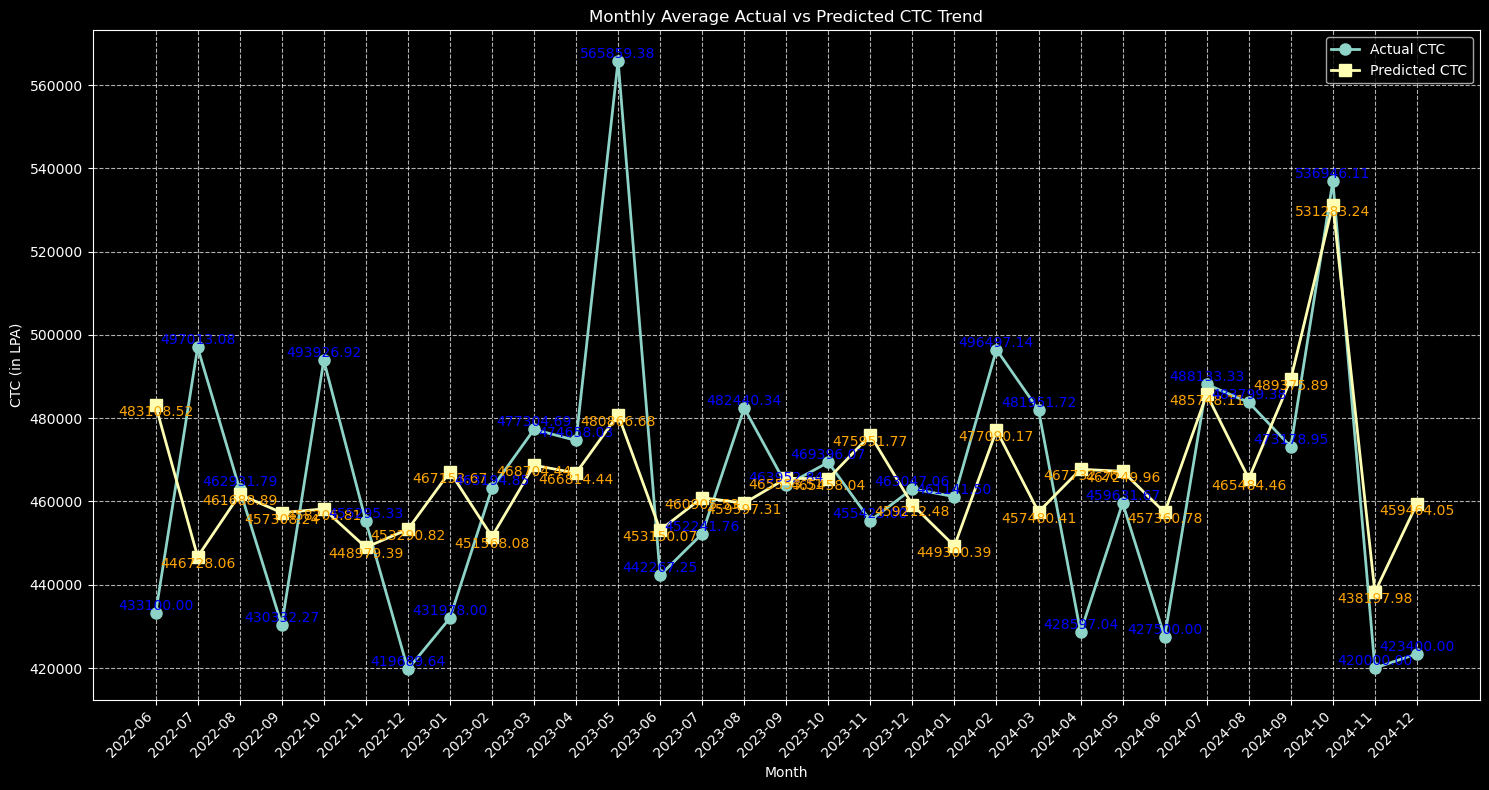

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop any NaN values first
merged_df = merged_df.dropna(subset=['offer_letter_date', 'actual_ctc', 'predicted_ctc'])

# Extract month from offer_letter_date
merged_df['month'] = pd.to_datetime(merged_df['offer_letter_date']).dt.strftime('%Y-%m')

# Calculate monthly averages for both actual and predicted CTC
monthly_averages = merged_df.groupby('month').agg({
    'actual_ctc': 'mean',
    'predicted_ctc': 'mean'
}).reset_index()

# Sort by month
monthly_averages = monthly_averages.sort_values('month')

# Create a figure with larger size
plt.figure(figsize=(15, 8))

# Create line plots for both actual and predicted CTC
plt.plot(monthly_averages['month'], monthly_averages['actual_ctc'], 
         marker='o', linewidth=2, markersize=8, label='Actual CTC')
plt.plot(monthly_averages['month'], monthly_averages['predicted_ctc'], 
         marker='s', linewidth=2, markersize=8, label='Predicted CTC')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('CTC (in LPA)')
plt.title('Monthly Average Actual vs Predicted CTC Trend')

# Add legend
plt.legend()

# Add value labels on top of each point
for i, row in enumerate(monthly_averages.itertuples()):
    plt.text(i, row.actual_ctc, f'{row.actual_ctc:.2f}', 
             ha='center', va='bottom', color='blue')
    plt.text(i, row.predicted_ctc, f'{row.predicted_ctc:.2f}', 
             ha='center', va='top', color='orange')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [120]:
len(merged_df)

714